#### Sr. Engineer: Dhruv Singh <br> Project Name: Success Classifier <br> Phase: Modelling <br> Date Updated: 01/18/2022

## Clustering Models Pt. 1 - K-means method
### Setting up for clustering analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [3]:
%matplotlib inline
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [4]:
does = pd.read_csv('1_readonly/Services.csv')

In [5]:
X = scale(does.iloc[:,:11])
y = does.iloc[:,-1]
X[0:10]

array([[ 0.34140699, -0.2132939 , -0.90152691, -0.15871427, -1.0287634 ,
        -0.13420889, -0.12231357, -0.06913238, -2.56132067, -0.04577306,
        -0.16640683],
       [ 0.34140699, -0.2132939 , -0.90152691, -0.15871427, -1.0287634 ,
        -0.13420889, -0.12231357, -0.06913238, -2.56132067, -0.04577306,
        -0.16640683],
       [ 1.10648994, -0.2132939 , -0.90152691, -0.15871427, -0.20249191,
        -0.13420889, -0.12231357, -0.06913238,  0.39042359, -0.04577306,
        -0.16640683],
       [ 1.10648994, -0.2132939 , -0.90152691, -0.15871427, -0.20249191,
        -0.13420889, -0.12231357, -0.06913238,  0.39042359, -0.04577306,
        -0.16640683],
       [ 1.33601482, -0.2132939 , -0.90152691, -0.15871427, -0.20249191,
        -0.13420889, -0.12231357, -0.06913238,  0.39042359, -0.04577306,
        -0.16640683],
       [ 1.33601482, -0.2132939 , -0.90152691, -0.15871427, -0.20249191,
        -0.13420889, -0.12231357, -0.06913238,  0.39042359, -0.04577306,
        -0.166

In [6]:
variable_names = does.columns

## Building and running your model

In [7]:
# instantiating a clustering object
clustering = KMeans(n_clusters=3, random_state=5)

# fitting model
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

## Plotting your model outputs

In [8]:
does_df = does.iloc[:,:11]

In [9]:
does_df.columns = ['Age_AtReg', 'Disability', 'Gender', 'CitizenStatus', 'EducationLevel', 'Race_Hispanic', 'Race_NativeAmerican', 'Race_Asian', 'Race_AfricanAmerican', 'Race_PacificIslander', 'Race_White']
y.columns = ['Employed']

Text(0.5, 1.0, 'K-Means Classification')

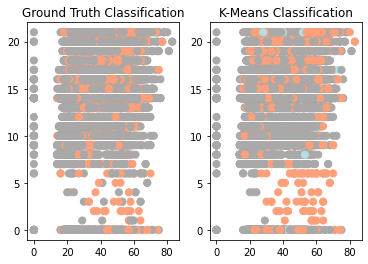

In [10]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=does_df.Age_AtReg, y=does_df.EducationLevel, c=color_theme[does.Employed], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=does_df.Age_AtReg, y=does_df.EducationLevel, c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

Text(0.5, 1.0, 'K-Means Classification')

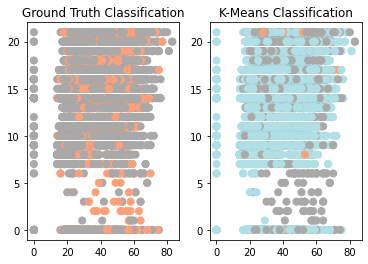

In [11]:
# relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)

'''
plt.subplot(1,2,1)

plt.scatter(x=does_df.Age_AtReg, y=does_df.EducationLevel, c=color_theme[does.Employed], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=does_df.Age_AtReg, y=does_df.EducationLevel, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')
'''

## Evaluate your clustering results

In [12]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       0.67      0.13      0.22     27513
           1       0.30      0.01      0.01     10750
           2       0.00      0.00      0.00         0

    accuracy                           0.10     38263
   macro avg       0.32      0.05      0.08     38263
weighted avg       0.57      0.10      0.16     38263



C:\Users\drewn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
